[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.1_mnist_cnn.ipynb)

## import

In [ ]:
'''
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()
'''

In [8]:
import numpy as np
import tensorflow as tf

# 파일 경로 설정 (환경에 맞게 수정하세요)
mnist_path = '../dataset/mnist/mnist.npz'  # 윈도우 예시
#mnist_path = 'D:/datasets/mnist.npz'  # 윈도우 예시
# mnist_path = '/home/user/datasets/mnist.npz'  # 리눅스 예시

# npz 파일 직접 로드
with np.load(mnist_path) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_valid = data['x_test']
    y_valid = data['y_test']

# 데이터 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_valid.shape, y_valid.shape)

# 정규화
#x_train = x_train / x_train.max()
#x_valid = x_valid / x_valid.max()

print("x_train[0, 10:15, 10:15] = " + repr(x_train[0, 10:15, 10:15]))
print("x_test[0, 10:15, 10:15] = " + repr(x_valid[0, 10:15, 10:15]))

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)
x_train[0, 10:15, 10:15] = array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)
x_test[0, 10:15, 10:15] = array([[ 0, 17, 66, 14, 67],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=uint8)


In [9]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


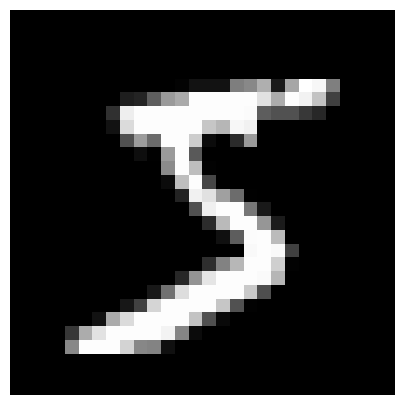

In [10]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)